In [ ]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ghadahabufadalah","key":"de122319d0d1bbd28f31eed8fb5c3b6c"}'}

In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:
!kaggle datasets download -d ghadahabufadalah/deep-learning

 98% 513M/526M [00:06<00:00, 73.9MB/s]
100% 526M/526M [00:06<00:00, 86.1MB/s]


In [ ]:
!unzip \*.zip

Archive:  deep-learning.zip
  inflating: test/040263.jpeg        
  inflating: test/0621724.jpeg       
  inflating: test/0777738.jpeg       
  inflating: test/10256151.jpeg      
  inflating: test/105615245.jpeg     
  inflating: test/10674923.jpeg      
  inflating: test/10779808.jpeg      
  inflating: test/109152324.jpeg     
  inflating: test/111993936.jpeg     
  inflating: test/11352122.jpeg      
  inflating: test/11545830.jpeg      
  inflating: test/117560797.jpeg     
  inflating: test/118551363.jpeg     
  inflating: test/119145669.jpeg     
  inflating: test/11971304.png       
  inflating: test/120186574.jpeg     
  inflating: test/12119481.png       
  inflating: test/121283966.jpeg     
  inflating: test/123325136.jpeg     
  inflating: test/123789527.jpeg     
  inflating: test/126307058.jpeg     
  inflating: test/126768317.jpg      
  inflating: test/127126503.jpeg     
  inflating: test/127438827.jpeg     
  inflating: test/128826625.jpeg     
  inflating: test/1290

In [ ]:
for dirpath,dirnames,filenames in os.walk("/content/train"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in '/content/train'.
there are 0 directories and 433 images in '/content/train/virus'.
there are 0 directories and 468 images in '/content/train/normal'.
there are 0 directories and 295 images in '/content/train/covid'.


In [ ]:
data_dir = pathlib.Path("/content/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['covid', 'normal', 'virus'], dtype='<U6')

In [ ]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img, cmap ="gray")
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")

    return img

['293542802.jpeg']
image shape (1337, 1508)


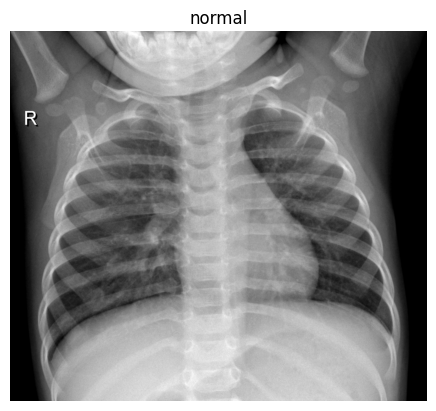

In [ ]:
img = view_image("/content/train/" , "normal")

['9574747.jpeg']
image shape (968, 1376)


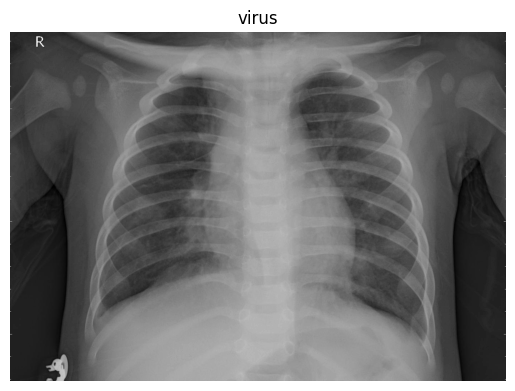

In [ ]:
img = view_image("/content/train/" , "virus")

['221929290.png']
image shape (480, 640, 3)


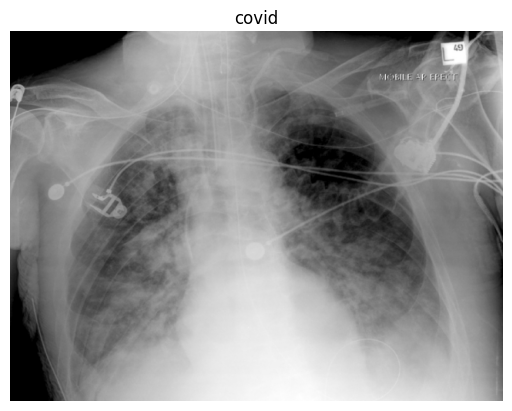

In [ ]:
img = view_image("/content/train/" , "covid")

In [ ]:
data=[]
labels=[]
covid=os.listdir("/content/train/covid/")
for a in covid:

    image = cv2.imread("/content/train/covid/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [ ]:
normal=os.listdir("/content/train/normal/")
for a in normal:

    image = cv2.imread("/content/train/normal/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(1)

In [ ]:
virus=os.listdir("/content/train/virus/")
for a in virus:

    image = cv2.imread("/content/train/virus/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(2)

In [ ]:
data = np.array(data) / 255.0
img_labels = np.array(labels)

In [ ]:
img_labels = tf.keras.utils.to_categorical(img_labels, num_classes=3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "/content/train"
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,             # Rescale pixel values to [0,1]
    rotation_range=40,          # Degree range for random rotations
    width_shift_range=0.2,      # Fraction of total width for random horizontal shifts
    height_shift_range=0.2,     # Fraction of total height for random vertical shifts
    shear_range=0.2,            # Shear intensity
    zoom_range=0.2,             # Range for random zoom
    horizontal_flip=True,       # Randomly flip images horizontally
    fill_mode='nearest'         # Strategy used for filling in newly created pixels
)

# Generate augmented data
train_generator = train_datagen.flow(
    data,
    batch_size=batch_size,
)

# **model 1**

In [ ]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))

model.add(Dense(units=3, activation="softmax"))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(data, img_labels, epochs=15, batch_size=32)

Epoch 1/15
38/38 [==============================] - 424s 11s/step - loss: 0.8548 - accuracy: 0.5911
Epoch 2/15
38/38 [==============================] - 418s 11s/step - loss: 0.3502 - accuracy: 0.8855
Epoch 3/15
38/38 [==============================] - 418s 11s/step - loss: 0.3088 - accuracy: 0.8930
Epoch 4/15
38/38 [==============================] - 411s 11s/step - loss: 0.1626 - accuracy: 0.9365
Epoch 5/15
15/38 [==========>...................] - ETA: 4:14 - loss: 0.1173 - accuracy: 0.9583

KeyboardInterrupt: 

# **model 2**

In [ ]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in base_model.layers:
  layer.trainable =False

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
base_model = tf.keras.applications.MobileNet(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
# Flatten the output of the base model
flatten_layer = tf.keras.layers.Flatten()(base_model.output)

# Add Dense layers
dense_layer_1 = tf.keras.layers.Dense(units=1024, activation="relu")(flatten_layer)
dense_layer_2 = tf.keras.layers.Dense(units=512, activation="relu")(dense_layer_1)
dense_layer_3 = tf.keras.layers.Dense(units=256, activation="relu")(dense_layer_2)

# Attention Mechanism
attention_probs = tf.keras.layers.Dense(units=1, activation='softmax')(dense_layer_3)
attention_mul = tf.keras.layers.multiply([dense_layer_3, attention_probs])

# Add prediction layer with softmax activation for multi-class classification
prediction_layer = tf.keras.layers.Dense(units=3, activation="softmax")(attention_mul)


In [ ]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(data, img_labels, epochs=15, batch_size=32)

Epoch 1/15
38/38 [==============================] - 294s 7s/step - loss: 4.1915 - accuracy: 0.8219
Epoch 2/15
38/38 [==============================] - 275s 7s/step - loss: 0.1752 - accuracy: 0.9691
Epoch 3/15
38/38 [==============================] - 272s 7s/step - loss: 0.1294 - accuracy: 0.9682
Epoch 4/15
38/38 [==============================] - 271s 7s/step - loss: 0.2945 - accuracy: 0.9666
Epoch 5/15
38/38 [==============================] - 283s 7s/step - loss: 0.0408 - accuracy: 0.9841
Epoch 6/15
38/38 [==============================] - 271s 7s/step - loss: 0.0273 - accuracy: 0.9891
Epoch 7/15
38/38 [==============================] - 267s 7s/step - loss: 0.2175 - accuracy: 0.9791
Epoch 8/15
38/38 [==============================] - 263s 7s/step - loss: 0.0844 - accuracy: 0.9774
Epoch 9/15
38/38 [==============================] - 266s 7s/step - loss: 0.0562 - accuracy: 0.9866
Epoch 10/15
38/38 [==============================] - 260s 7s/step - loss: 0.0356 - accuracy: 0.9875
Epoch 11/

# **model 3**

In [ ]:
base_model = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

219055592/219055592 [==============================] - 1s 0us/step


In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(data, img_labels, epochs=15, batch_size=32)

Epoch 1/15
38/38 [==============================] - 202s 5s/step - loss: 0.0768 - accuracy: 0.9749
Epoch 2/15
38/38 [==============================] - 190s 5s/step - loss: 0.0684 - accuracy: 0.9774
Epoch 3/15
38/38 [==============================] - 190s 5s/step - loss: 0.0801 - accuracy: 0.9732
Epoch 4/15
38/38 [==============================] - 190s 5s/step - loss: 0.0614 - accuracy: 0.9808
Epoch 5/15
38/38 [==============================] - 190s 5s/step - loss: 0.0643 - accuracy: 0.9758
Epoch 6/15
38/38 [==============================] - 189s 5s/step - loss: 0.0558 - accuracy: 0.9783
Epoch 7/15
38/38 [==============================] - 190s 5s/step - loss: 0.0487 - accuracy: 0.9841
Epoch 8/15
38/38 [==============================] - 190s 5s/step - loss: 0.0497 - accuracy: 0.9824
Epoch 9/15
38/38 [==============================] - 190s 5s/step - loss: 0.0802 - accuracy: 0.9666
Epoch 10/15
38/38 [==============================] - 189s 5s/step - loss: 0.0463 - accuracy: 0.9816
Epoch 11/

# **model 4**

In [ ]:
#highest acc 0.96742
import tensorflow as tf

# Define the base model
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights="imagenet", include_top=False)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output of the base model
model = tf.keras.layers.Flatten()(base_model.output)

# Add Dense layers
model = tf.keras.layers.Dense(units=1024, activation="relu")(model)
model = tf.keras.layers.Dense(units=512, activation="relu")(model)
model = tf.keras.layers.Dense(units=256, activation="relu")(model)

# Attention Mechanism
attention_probs = tf.keras.layers.Dense(units=256)(model)  # Apply Dense layer
attention_probs = tf.keras.layers.Reshape((1, 256))(attention_probs)  # Reshape to match sequence length
attention_mul = tf.keras.layers.multiply([attention_probs, tf.keras.layers.Reshape((1, 256))(model)])  # Element-wise multiplication

# Flatten the output of the attention layer
attention_mul = tf.keras.layers.Flatten()(attention_mul)

# Add prediction layer with softmax activation for multi-class classification
prediction_layer = tf.keras.layers.Dense(units=3, activation="softmax")(attention_mul)

# Define the model
model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

# Compile the model with the Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


17225924/17225924 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)         128       ['conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 conv1_relu (ReLU)           

In [ ]:
early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

In [ ]:
model.fit(data, img_labels, epochs=40, batch_size=32,callbacks=[early_stopping])

Epoch 1/40
38/38 [==============================] - 97s 3s/step - loss: 0.0975 - accuracy: 0.9891
Epoch 2/40
38/38 [==============================] - 95s 3s/step - loss: 0.1152 - accuracy: 0.9891
Epoch 3/40
38/38 [==============================] - 94s 2s/step - loss: 0.1624 - accuracy: 0.9841
Epoch 4/40
38/38 [==============================] - 103s 3s/step - loss: 0.0084 - accuracy: 0.9983
Epoch 5/40
38/38 [==============================] - 106s 3s/step - loss: 8.3554e-04 - accuracy: 1.0000
Epoch 6/40
38/38 [==============================] - 100s 3s/step - loss: 1.8119e-04 - accuracy: 1.0000
Epoch 7/40
38/38 [==============================] - 98s 3s/step - loss: 2.4021e-08 - accuracy: 1.0000
Epoch 8/40
38/38 [==============================] - 96s 3s/step - loss: 2.3722e-08 - accuracy: 1.0000
Epoch 9/40
38/38 [==============================] - 97s 3s/step - loss: 2.3622e-08 - accuracy: 1.0000
Epoch 10/40
38/38 [==============================] - 91s 2s/step - loss: 2.3523e-08 - accuracy:

In [ ]:
image_files =  os.listdir("/content/test")
image_files = [file for file in image_files if file.endswith(('jpg', 'jpeg', 'png'))]

In [ ]:
from keras.preprocessing import image
predictions = []
predictions_df = pd.DataFrame(columns=['Image', 'Label'])

for img_file in image_files:
    img_path = os.path.join('/content/test', img_file)
    img = image.load_img(img_path, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Normalize pixel values if necessary
    prediction_prob = model.predict(img)
    prediction_class = np.argmax(prediction_prob, axis=1)[0]
    predictions.append(prediction_class)
    predictions_df = pd.concat([predictions_df, pd.DataFrame({'Image': [img_file], 'Label': [prediction_class]})], ignore_index=True)

1/1 [==============================] - 0s 70ms/step


In [ ]:
predictions_df['label'] = predictions_df['Label'].replace({0: 'covid', 1: 'normal', 2: 'virus'})
predictions_df.drop(columns=['Label'], inplace=True)
predictions_df.reset_index(drop=True, inplace=True)
predictions_df.rename(columns={'label': 'Label'}, inplace=True)

In [ ]:
predictions_df.to_csv("project2_final19.csv")